In [82]:
from monopoly_library.monopoly_main import Monopoly, Player

import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt
import random
sns.set_style('whitegrid')
%matplotlib inline

In [83]:
def summarise_monopoly_runs(a_list, a_board, drop_jail=False):
    
    """Summarises value counts of Monopoly games"""
    
    pd_temp = pd.DataFrame(a_list,columns=['Game','Player','Move','Location'])
    pd_temp.drop(labels=['Game', 'Player','Move'],axis=1,inplace=True)
    
    # If drop_jail is True, drop all instances of 10
    if drop_jail:
        
        pd_temp = pd_temp[pd_temp['Location'] != 10]
    
    pd_output = pd.DataFrame(pd_temp.value_counts(), columns=['Count'])
    pd_output.reset_index(level=0, inplace=True)
    
    pd_output['Location Name']= pd_output['Location'].apply(lambda x: a_board.board_file[x][0])
    pd_output['Colour']= pd_output['Location'].apply(lambda x: a_board.board_file[x][1])
    
    pd_output['Count %'] = pd_output['Count'] / pd_output['Count'].sum()
    
    return pd_output      

In [86]:
def create_monopoly_sample(num_games, num_players, num_test_moves_mean):
    
    """Creates a sample of Monopoly games"""
    """Generates tuple(game #, player #, move #, location)"""

    num_games = num_games
    num_players = num_players
    num_test_moves_mean = num_test_moves_mean

    landed_locations = list()

    for i in tqdm(range(num_games)):

        game = Monopoly('./monopoly_library/monopoly_board_aus.txt', 
                        './monopoly_library/monopoly_chance_aus.csv', './monopoly_library/monopoly_community_aus.csv')

        for player in range(num_players):
        
            player_test = Player(player_name='test_player',board=game)
            
            # normally distributed number of test moves in each game
            
            num_test_moves = int(random.gauss(mu=num_test_moves_mean, sigma=3))

            for move in range(num_test_moves):

                landed_locations.append((i, player, move, player_test.roll_turn()))
            
    return landed_locations

In [87]:
# assume number of test moves is normally distributed, mean = 30 

test_1 = create_monopoly_sample(num_games=1000,num_players=4,num_test_moves_mean=30)

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:51<00:00, 19.59it/s]


In [88]:
game = Monopoly('./monopoly_library/monopoly_board_aus.txt', 
                        './monopoly_library/monopoly_chance_aus.csv', './monopoly_library/monopoly_community_aus.csv')

pd_sample = summarise_monopoly_runs(test_1, game)

In [89]:
pd_sample.head()

,Location,Count,Location Name,Colour,Count %
0,10,17477,Jail,NA,0.148051
1,5,3510,Kings Cross Station,Station,0.029734
2,24,3503,Trafalgar Square,Red,0.029675
3,19,3280,Vine Street,Orange,0.027786
4,11,3216,Pall Mall,Pink,0.027243


In [90]:
pd_sample['Colour'].unique()

array(['NA', 'Station', 'Red', 'Orange', 'Pink', 'Utilities',
       'Light Blue', 'Yellow', 'Green', 'Dark Blue', 'Brown'],
      dtype=object)

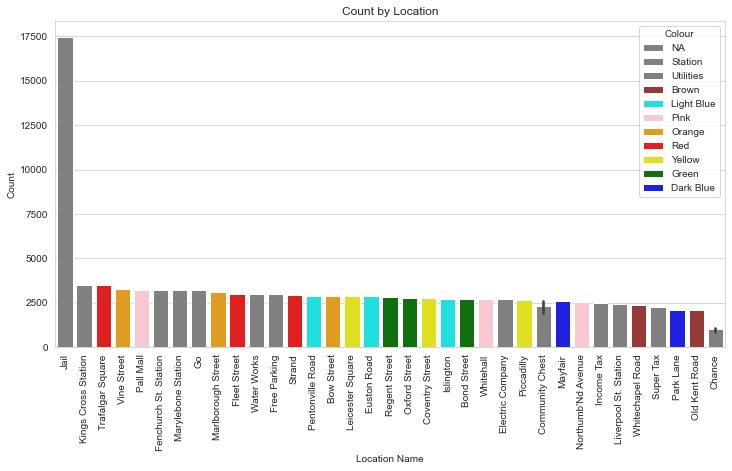

In [91]:
fig, ax = plt.subplots(figsize=(12,6))

hue_order = ['NA', 'Station', 'Utilities', 'Brown', 'Light Blue', 
             'Pink', 'Orange', 'Red', 'Yellow', 'Green', 'Dark Blue']

palette = ['Gray', 'Gray', 'Gray', 'Brown', 'Cyan',
          'Pink', 'Orange', 'Red', 'Yellow', 'Green', 'Blue']

sns.barplot(data=pd_sample, x='Location Name', y='Count', hue ='Colour', ax=ax, dodge=False, hue_order=hue_order,palette=palette)

ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
ax.set_title('Count by Location')

plt.show()

In [92]:
pd_sample.tail()

,Location,Count,Location Name,Colour,Count %
34,1,2084,Old Kent Road,Brown,0.017654
35,2,1942,Community Chest,NA,0.016451
36,7,1106,Chance,NA,0.009369
37,22,1075,Chance,NA,0.009107
38,36,865,Chance,NA,0.007328


In [93]:
pd_sample_nojail = summarise_monopoly_runs(test_1, game, drop_jail=True)

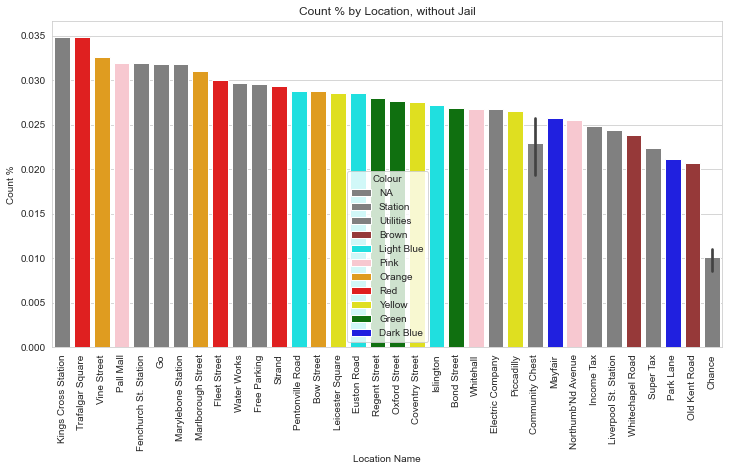

In [94]:
fig, ax = plt.subplots(figsize=(12,6))

hue_order = ['NA', 'Station', 'Utilities', 'Brown', 'Light Blue', 
             'Pink', 'Orange', 'Red', 'Yellow', 'Green', 'Dark Blue']

palette = ['Gray', 'Gray', 'Gray', 'Brown', 'Cyan',
          'Pink', 'Orange', 'Red', 'Yellow', 'Green', 'Blue']

sns.barplot(data=pd_sample_nojail, x='Location Name', y='Count %', hue ='Colour', ax=ax, dodge=False, hue_order=hue_order,palette=palette)

ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
ax.set_title('Count % by Location, without Jail')

plt.show()

In [95]:
test_1

[(0, 0, 0, 10),
 (0, 0, 1, 10),
 (0, 0, 2, 35),
 (0, 0, 3, 38),
 (0, 0, 4, 4),
 (0, 0, 5, 13),
 (0, 0, 6, 19),
 (0, 0, 7, 26),
 (0, 0, 8, 36),
 (0, 0, 9, 1),
 (0, 0, 10, 12),
 (0, 0, 11, 22),
 (0, 0, 12, 31),
 (0, 0, 13, 9),
 (0, 0, 14, 16),
 (0, 0, 15, 25),
 (0, 0, 16, 10),
 (0, 0, 17, 10),
 (0, 0, 18, 29),
 (0, 0, 19, 38),
 (0, 0, 20, 5),
 (0, 0, 21, 15),
 (0, 0, 22, 23),
 (0, 0, 23, 28),
 (0, 0, 24, 33),
 (0, 0, 25, 0),
 (0, 0, 26, 3),
 (0, 0, 27, 12),
 (0, 0, 28, 21),
 (0, 0, 29, 10),
 (0, 0, 30, 10),
 (0, 0, 31, 10),
 (0, 1, 0, 11),
 (0, 1, 1, 16),
 (0, 1, 2, 21),
 (0, 1, 3, 27),
 (0, 1, 4, 35),
 (0, 1, 5, 39),
 (0, 1, 6, 5),
 (0, 1, 7, 16),
 (0, 1, 8, 20),
 (0, 1, 9, 31),
 (0, 1, 10, 0),
 (0, 1, 11, 9),
 (0, 1, 12, 19),
 (0, 1, 13, 26),
 (0, 1, 14, 8),
 (0, 1, 15, 13),
 (0, 1, 16, 18),
 (0, 1, 17, 27),
 (0, 1, 18, 33),
 (0, 1, 19, 38),
 (0, 1, 20, 4),
 (0, 1, 21, 9),
 (0, 1, 22, 15),
 (0, 1, 23, 26),
 (0, 1, 24, 34),
 (0, 1, 25, 3),
 (0, 1, 26, 11),
 (0, 1, 27, 17),
 (0, 1, 28, 3